<h1> draft for intial data Analysis </h1>

This notebook contain drafts for analysis functions, plotting functions, and scripts for the 6OHDA project

import modules and files:

In [1]:
%matplotlib notebook 
%load_ext autoreload
%autoreload 2


#inline
import os
os.chdir('C:\\Users\\zemel\\Documents\\Reaserch\\PythonProjects\\6OHDA')
#import mpld3
#mpld3.enable_notebook()
import numpy as np
import scipy as sci
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import gridspec
import sys
import h5py
from IO import *
from utils import *
from plotUtils import *

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\zemel\\Documents\\Reaserch\\PythonProjects\\6OHDA'

collect data from all mice, and plot beta power over group by day:

In [2]:
baselines = getData('Processed.h5',['lfp'],period ='Pre',day = lambda x: int(x)==0)
early = getData('Processed.h5',['lfp'],period ='Pre',day = lambda x: (int(x)<= 4) & (x>0))
mid = getData('Processed.h5',['lfp'],period ='Pre',day = lambda x: (int(x)> 4) & (x<=10))
late = getData('Processed.h5',['lfp'],period ='Pre',day = lambda x: (int(x)> 10))

cleaning up lfp data
I deleted session: 1793_BaselineS
I deleted session: 8815_BaselineA
cleaning up lfp data
I deleted session: 8803_day2
cleaning up lfp data
I deleted session: 1236_day9
I deleted session: 8803_day8
cleaning up lfp data
I deleted session: 8815_day34L


In [3]:
def getPowerSpec(lfpDict):
    # This function takes in a dict with lfp data (that was returned from getData())
    # and returns the average power spectra
    # Inputs: 
    #   lfpDict - a dictionary with lfp data as returned from getData()
    # Outputs:
    #   M - mean power spectra
    #   Std - standard diviation of power spectra
    #   f - frequency list

    data = []
    for j in lfpDict:
        lfp = lfpDict[j]['lfp']['lfp']
        f, t, Sxx = signal.spectrogram(lfp[0,:],lfpDict[j]['lfp']['FS'],window=('hamming'),nperseg=140,noverlap =120,nfft=1200)

        Power = np.sum(Sxx,1)
        totPower = np.sum(Power)
        #beta = np.mean(getPowerInBand(f,Sxx,13,20)/np.sum(Sxx,axis = 0)
        data.append(Power/totPower)    



    data = np.array(data)
    M = np.mean(data,axis=0)
    Std = np.std(data, axis = 0)
    return M, Std, f

<IPython.core.display.Javascript object>


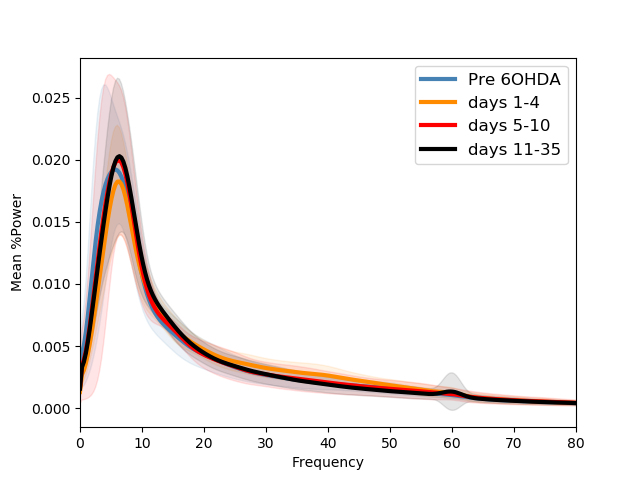

(0, 80)

In [4]:
cond = ['baselines','early','mid','late']
Names = {'baselines':'Pre 6OHDA','early':'days 1-4','mid':'days 5-10' ,'late':'days 11-35'}
Colors = {'baselines':'steelblue','early':'darkorange','mid':'red' ,'late':'black'}

for c in cond:
    M,Std, f = getPowerSpec(eval(c))
    plt.plot(f, M, linewidth=3,color=Colors[c],label=Names[c])
    plt.fill_between(f, M-Std, M+Std,color=Colors[c],alpha=0.1)
plt.ylabel('Mean %Power')
plt.xlabel('Frequency')
plt.legend(fontsize=12)
plt.xlim((0,80))

<h2> Aligning Ca activity to movement: </h2>

In [2]:
PVdataH = getData('Processed.h5',['trace','mvmt'],period ='Pre',cre='PV',red=True, day=(lambda x: int(x)==0))
PVdataP = getData('Processed.h5',['trace','mvmt'],period ='Pre',cre='PV',red=True, day=(lambda x: int(x)>0))
CHIdataH = getData('Processed.h5',['trace','mvmt'],period ='Pre',cre='CHI',red=True, day=(lambda x: int(x)==0))
CHIdataP = getData('Processed.h5',['trace','mvmt'],period ='Pre',cre='CHI',red=True, day=(lambda x: int(x)>0))
MSNdataH = getData('Processed.h5',['trace','mvmt'],period ='Pre',red=False, day=(lambda x: int(x)==0))
MSNdataP = getData('Processed.h5',['trace','mvmt'],period ='Pre',red=False, day=(lambda x: int(x)>0))

cleaning up trace data
cleaning up mvmt data
cleaning up trace data
I deleted session: 1236_day9
I deleted session: 8430_day15A
I deleted session: 8430_day3
I deleted session: 8803_day14
I deleted session: 8803_day15A
I deleted session: 8803_day19L
I deleted session: 8803_day2
I deleted session: 8803_day30A
I deleted session: 8803_day34L
I deleted session: 8803_day4
I deleted session: 8803_day6
I deleted session: 8803_day8
cleaning up mvmt data
cleaning up trace data
I deleted session: 1208_BaselineA
I deleted session: 1208_BaselineL
I deleted session: 1208_BaselineS
I deleted session: 1793_BaselineS
I deleted session: 8815_BaselineA
I deleted session: 8815_BaselineL
I deleted session: 8815_BaselineS
cleaning up mvmt data
cleaning up trace data
I deleted session: 1208_day10
I deleted session: 1208_day14
I deleted session: 1208_day15A
I deleted session: 1208_day2
I deleted session: 1208_day34L
I deleted session: 1208_day4
I deleted session: 1208_day6
I deleted session: 1208_day8
I delet

Check how many sessions left in each condition:

In [3]:
cond = ['PVdataH','PVdataP','CHIdataH','CHIdataP','MSNdataH','MSNdataP']
for c in cond:
    print(c + ':' + str(len(eval(c + '.keys()'))) + ' sessions')

PVdataH:9 sessions
PVdataP:21 sessions
CHIdataH:0 sessions
CHIdataP:0 sessions
MSNdataH:14 sessions
MSNdataP:47 sessions


because there aren't any current CHI session, remove from cond list: 

In [4]:
cond = ['PVdataH','PVdataP','MSNdataH','MSNdataP']
Names = {'PVdataH':'PV - healthy','PVdataP':'PV - post 6OHDA','MSNdataH':'MSN - healthy','MSNdataP':'MSN - post 6OHDA'}
Colors = {'PVdataH':'mediumseagreen','PVdataP':'darkgreen','MSNdataH':'cornflowerblue','MSNdataP':'navy'}

Visially inspect how traces looks:

In [ ]:
rosterPlot(PVdataH['1236_BaselineS']['trace']['dff'],1/PVdataH['1236_BaselineA']['trace']['Fs'],5)

<b>** make a note to double check all traces and remove the bad ones prior to making final struct file</b>

for now: continue with the analysis.
find onset of Ca events - align to movement onset and plot


<IPython.core.display.Javascript object>


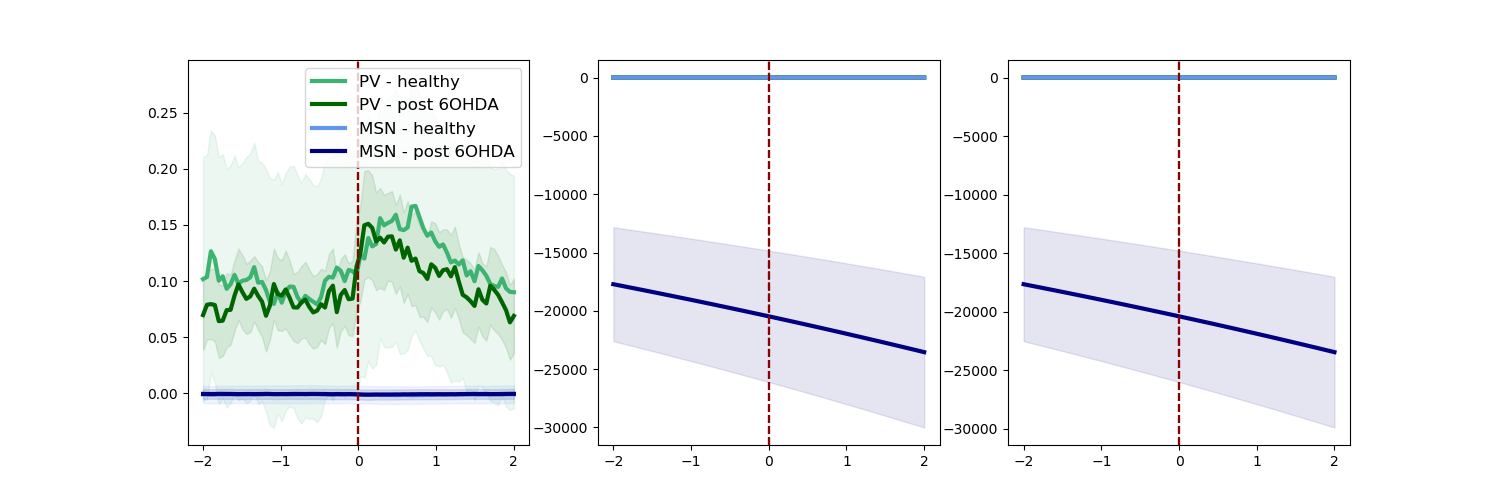

(11901, 13)
(80, 13)
(11901, 15)
(80, 15)
1236_BaselineL : (80, 16) (80, 14)
(11901, 9)
(80, 9)
1236_BaselineS : (80, 10) (80, 30)
(11901, 3)
(80, 3)
8430_BaselineA : (80, 4) (80, 40)
(11901, 3)
(80, 3)
8430_BaselineL : (80, 4) (80, 44)
(11901, 1)
(80, 1)
8430_BaselineS : (80, 2) (80, 48)
(11901, 4)
(80, 4)
8803_BaselineA : (80, 5) (80, 50)
(11901, 3)
(80, 3)
8803_BaselineL : (80, 4) (80, 55)
(11901, 3)
(80, 3)
8803_BaselineS : (80, 4) (80, 59)
(11901, 5)
(80, 5)
(11901, 3)
(80, 3)
1236_day11 : (80, 4) (80, 6)
(11901, 7)
(80, 7)
1236_day13 : (80, 8) (80, 10)
(11901, 5)
(80, 5)
1236_day15A : (80, 6) (80, 18)
(11901, 4)
(80, 4)
1236_day19L : (80, 5) (80, 24)
(11901, 4)
(80, 4)
1236_day3 : (80, 5) (80, 29)
(11901, 5)


C:\Users\zemel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\zemel\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(80, 5)
1236_day30A : (80, 6) (80, 34)
(11901, 6)
(80, 6)
1236_day35L : (80, 7) (80, 40)
(11901, 3)
(80, 3)
1236_day5 : (80, 4) (80, 47)
(11901, 6)
(80, 6)
1236_day7 : (80, 7) (80, 51)
(11901, 3)
(80, 3)
8430_day1 : (80, 4) (80, 58)
(11901, 1)
(80, 1)
8430_day11 : (80, 2) (80, 62)
(11901, 7)
(80, 7)
8430_day13 : (80, 8) (80, 64)
(11901, 4)
(80, 4)
8430_day19L : (80, 5) (80, 72)
(11901, 2)
(80, 2)
8430_day30A : (80, 3) (80, 77)
(11901, 2)
(80, 2)
8430_day35L : (80, 3) (80, 80)
(11901, 2)
(80, 2)
8430_day5 : (80, 3) (80, 83)
(11901, 4)
(80, 4)
8430_day7 : (80, 5) (80, 86)
(11901, 1)
(80, 1)
8430_day9 : (80, 2) (80, 91)
(11901, 1)
(80, 1)
8803_day10 : (80, 2) (80, 93)
(11901, 1)
(80, 1)
8803_day12 : (80, 2) (80, 95)
(11901, 506)
(80, 506)
(11901, 477)
(80, 477)
1208_BaselineL : (80, 478) (80, 507)
(11901, 509)
(80, 509)
1208_BaselineS : (80, 510) (80, 985)
(11901, 546)
(80, 546)
1236_BaselineA : (80, 547) (80, 1495)
(11901, 152)
(80, 152)
1236_BaselineL : (80, 153) (80, 2042)
(11901, 472)

C:\Users\zemel\Documents\Reaserch\PythonProjects\6OHDA\utils.py:173: RuntimeWarning: divide by zero encountered in true_divide
  peakList = ((traceFilt-np.mean(traceFilt[~oldPeaks]))/np.std(traceFilt[~oldPeaks]))>th
C:\Users\zemel\Documents\Reaserch\PythonProjects\6OHDA\utils.py:173: RuntimeWarning: invalid value encountered in true_divide
  peakList = ((traceFilt-np.mean(traceFilt[~oldPeaks]))/np.std(traceFilt[~oldPeaks]))>th
C:\Users\zemel\Documents\Reaserch\PythonProjects\6OHDA\utils.py:173: RuntimeWarning: invalid value encountered in greater
  peakList = ((traceFilt-np.mean(traceFilt[~oldPeaks]))/np.std(traceFilt[~oldPeaks]))>th


(80, 472)
1236_BaselineS : (80, 473) (80, 2195)
(11901, 356)
(80, 356)
8430_BaselineA : (80, 357) (80, 2668)
(11901, 169)
(80, 169)
8430_BaselineL : (80, 170) (80, 3025)
(11901, 96)
(80, 96)
8430_BaselineS : (80, 97) (80, 3195)
(11901, 342)
(80, 342)
8803_BaselineA : (80, 343) (80, 3292)
(11901, 402)
(80, 402)
8803_BaselineL : (80, 403) (80, 3635)
(11901, 393)
(80, 393)
8803_BaselineS : (80, 394) (80, 4038)
(11901, 370)
(80, 370)
8815_BaselineL : (80, 371) (80, 4432)
(11901, 316)
(80, 316)
8815_BaselineS : (80, 317) (80, 4803)
(11901, 243)
(80, 243)
(11901, 221)
(80, 221)
1208_day14 : (80, 222) (80, 244)
(11901, 265)
(80, 265)
1208_day15A : (80, 266) (80, 466)
(11901, 217)
(80, 217)
1208_day2 : (80, 218) (80, 732)
(11901, 351)
(80, 351)
1208_day34L : (80, 352) (80, 950)
(11901, 246)
(80, 246)
1208_day4 : (80, 247) (80, 1302)
(11901, 247)
(80, 247)
1208_day6 : (80, 248) (80, 1549)
(11901, 190)
(80, 190)
1208_day8 : (80, 191) (80, 1797)
(11901, 143)
(80, 143)
1236_day1 : (80, 144) (80, 1

C:\Users\zemel\Documents\Reaserch\PythonProjects\6OHDA\utils.py:169: RuntimeWarning: invalid value encountered in greater
  peakList = ((traceFilt-np.mean(traceFilt[~oldPeaks]))/np.std(traceFilt[~oldPeaks]))>th


(80, 62)
8815_day15A : (80, 63) (80, 9427)
(11901, 702)
(80, 702)
8815_day19L : (80, 703) (80, 9490)
(11901, 73)
(80, 73)
8815_day2 : (80, 74) (80, 10193)
(11901, 378)
(80, 378)
8815_day30A : (80, 379) (80, 10267)
(11901, 142)
(80, 142)
8815_day4 : (80, 143) (80, 10646)
(11901, 82)
(80, 82)
8815_day6 : (80, 83) (80, 10789)
(11901, 159)
(80, 159)
8815_day8 : (80, 160) (80, 10872)


In [37]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))

de = {}

dt = 1/PVdataH['1236_BaselineA']['trace']['Fs'][0]   # random session, assuming all session have the same dt...
tPlot = np.linspace(-40*dt,40*dt,80)


for c in cond:
    data = eval(c)
    for s in data.keys():
        
        # Vectors are saved as column vectors so.. transposed to raw vector
        if data[s]['trace']['dff'].shape[1] == 1:
            data[s]['trace']['dff'] = data[s]['trace']['dff'].T
                
        sOnset = FindMvmtOnset(data[s]['mvmt']['speed'],hi = 25)    
        print(data[s]['trace']['dff'].T.shape)
        caOnset = formatCaOnset(data[s]['trace']['dff'].T,th = 2, th2 = 3)
        
        sA = alignToOnset(data[s]['trace']['dff'].T, sOnset, winPost=40,winPre=40)
        
        cAs = np.empty((tPlot.size,0))
        #n = 0
        for p in range(0,caOnset.shape[1]):
            al = alignToOnset(data[s]['mvmt']['speed'], caOnset[:,p], winPost=40,winPre=40)
            if al.ndim ==1:
                al.shape = (tPlot.size,1)
        #    n = n +al.shape[1]
            cAs = np.concatenate((cAs,np.mean(al,1,keepdims=True)),axis=1)
        
        cAr = np.empty((tPlot.size,0))
        for p in range(0,caOnset.shape[1]):
            al = alignToOnset(data[s]['mvmt']['rot'], caOnset[:,p], winPost=40,winPre=40)
            if al.ndim ==1:
                al.shape = (tPlot.size,1)
            cAr = np.concatenate((cAs,np.mean(al,1,keepdims=True)),axis=1)

        if len(sA.shape) > 2:
            sA = np.mean(sA,2)
            if 'sAligned' not in locals():
#                print(s+' :',sA.shape)
                sAligned = sA
            else:
#                print(s+' :',sA.shape,sAligned.shape)
                sAligned = np.concatenate((sAligned,sA),axis=1)
        
        print(cAs.shape)
        
        if cAs.ndim > 1:
#            cAs = np.mean(cAs,1)
            if 'caAlignedS' not in locals():
    #           print(s+' :',sA.shape)
                caAlignedS = cAs
            else:
#                print(s+' :',cAs.shape,caAlignedS.shape)
                caAlignedS = np.concatenate((caAlignedS,cAs),axis=1)

        if cAr.ndim > 1:
#            cAr = np.mean(cAr,1)
            if 'caAlignedR' not in locals():
    #            print(s+' :',sA.shape)
                caAlignedR = cAr
            else:
                print(s+' :',cAr.shape,caAlignedR.shape)
                caAlignedR = np.concatenate((caAlignedR,cAr),axis=1)

    
    PlotRelativeToOnset(ax[0],sAligned,tPlot,Color=Colors[c],Label=Names[c],mesErr=True)
    PlotRelativeToOnset(ax[1],caAlignedS,tPlot,Color=Colors[c],Label=Names[c],mesErr=True)
    PlotRelativeToOnset(ax[2],caAlignedR,tPlot,Color=Colors[c],Label=Names[c],mesErr=True)
    del sAligned
    del caAlignedS
    del caAlignedR
ax[0].legend(fontsize=12)

<IPython.core.display.Javascript object>


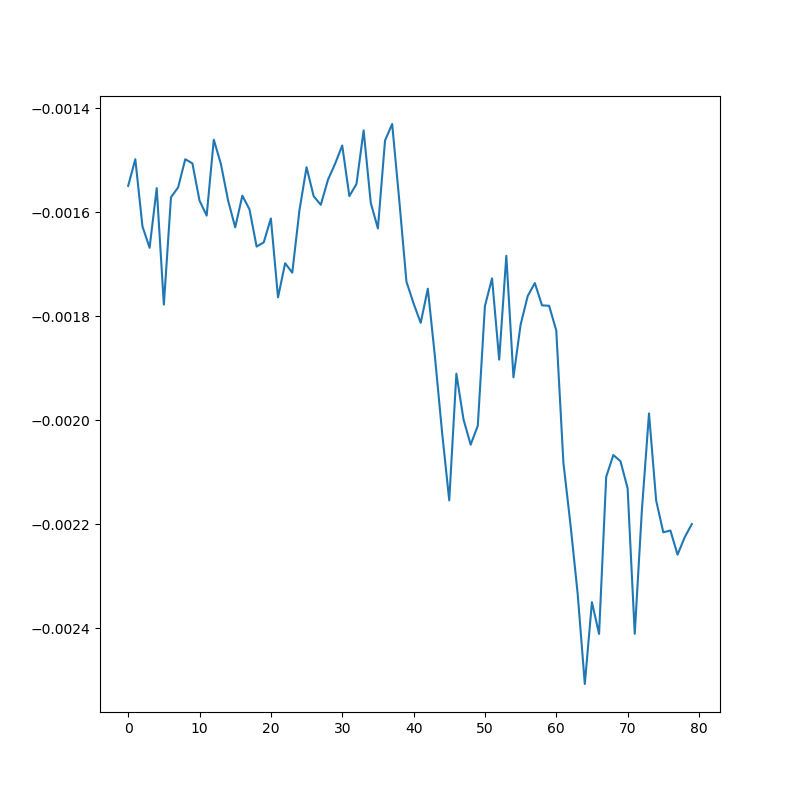

In [14]:
c  = cond[2]
fig, ax = plt.subplots(1,1,figsize=(8, 8))
#PlotRelativeToOnset(ax,de[c],tPlot,Color=Colors[c],Label=Names[c],mesErr=True)
plt.plot(np.nanmean(de[c],axis=1))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5, 5.0))
plt.plot(PVdataH['8803_BaselineA']['mvmt']['speed'])

In [36]:
#del sAligned
#del caAlignedS
#del caAlignedR
del data


In [43]:
%%timeit 
cAs = np.empty((tPlot.size,0))
for p in range(0,caOnset.shape[1]):
    al = alignToOnset(data[s]['mvmt']['speed'], caOnset[:,p], winPost=40,winPre=40)
    if al.ndim ==1:
        al.shape = (tPlot.size,1)
    cAs = np.concatenate((cAs,al),axis=1)

5.22 s ± 290 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%%timeit 
cAs = np.empty((tPlot.size,0))
n = 0
for p in range(0,caOnset.shape[1]):
    al = alignToOnset(data[s]['mvmt']['speed'], caOnset[:,p], winPost=40,winPre=40)
    if al.ndim ==1:
        al.shape = (tPlot.size,1)
    n = n +al.shape[1]
    cAs = np.concatenate((cAs,np.mean(al,1,keepdims=True)),axis=1)
print(cAs.shape)

(80, 509)
(80, 509)
(80, 509)
(80, 509)
(80, 509)
(80, 509)
(80, 509)
(80, 509)
823 ms ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
cAs.shape

(80, 44259)

In [46]:
caOnset.shape

(11901, 509)

In [66]:
from utils import alignToOnset

In [20]:
#caOnset = formatCaOnset(data[s]['trace']['dff'].T,th = 2, th2 = 3)
data[s]['trace']['dff'].T[:,0].shape
#y,x = getCaOnset(data[s]['trace']['dff'].T[:,0],2,3,wlenMA=10,wlenDetrend=500,oldPeaks=None)

data[s]['trace']['dff'].shape

(11901, 1)